<a href="https://colab.research.google.com/github/khan5125/Capstone-Projects/blob/main/Inferential_Statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covariation and Correlation:
## Covariation (Covariance)

How two variables vary together — whether increases in one variable are associated with increases or decreases in another.

➤ Interpretation:

Positive covariance: variables increase together.

Negative covariance: one increases while the other decreases.

Zero covariance: no linear relationship.


## Correlation

Correlation standardizes covariance and measures the strength and direction of a linear relationship.

➤ Values:

r = 1:  Perfect positive correlation

r = -1: Perfect negative correlation

r = 0:  No linear relationship



In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [120]:
df = sns.load_dataset('tips')

In [121]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [123]:
# df.cov(numeric_only=True)
cov = df.cov(numeric_only=True)
print(cov)

            total_bill       tip      size
total_bill   79.252939  8.323502  5.065983
tip           8.323502  1.914455  0.643906
size          5.065983  0.643906  0.904591


In [124]:
# df.corr(numeric_only=True)
corr = df.corr(numeric_only=True)
print(corr)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


In [125]:
# We can also check the relationship between variables one by one
corr_two_varaible = df['total_bill'].corr(df['tip'])
print(corr_two_varaible)

0.6757341092113641


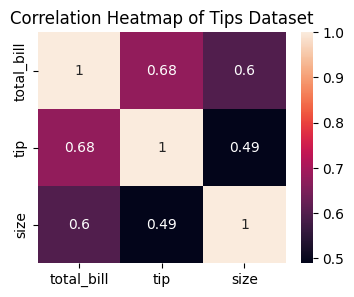

In [126]:
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap of Tips Dataset')
plt.show()

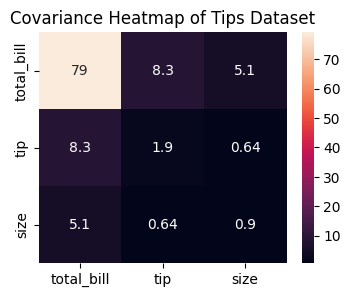

In [127]:
plt.figure(figsize=(4, 3))
sns.heatmap(cov, annot=True)
plt.title('Covariance Heatmap of Tips Dataset')
plt.show()

In [128]:
# Best is Correlation:
# In simple linear regression | we can use covariance as well.

# Central Limit Theoram
1. Population means and means of sample means are almost equal in CTL:

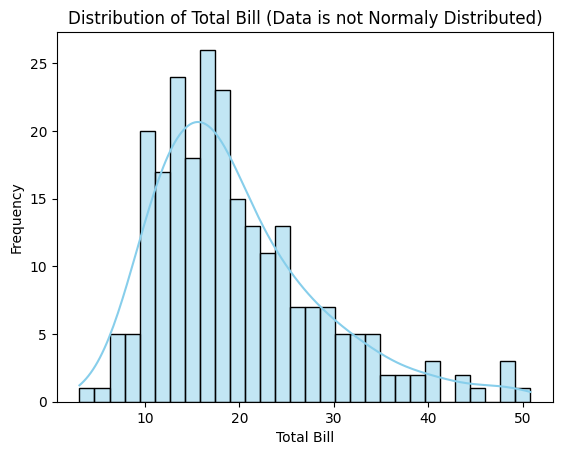

In [129]:
# Load tips dataset
tips = sns.load_dataset("tips")
data = tips['total_bill']

sns.histplot(data, bins=30, kde=True, color="skyblue")
plt.title("Distribution of Total Bill (Data is not Normaly Distributed)")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()

In [130]:
np.mean(data)

np.float64(19.78594262295082)

In [131]:
# Central Limit Theorem demonstration
sample_means = []

# Take 1000 samples, we can coose any number greater than or equal to 30
for no_samples in range(1000):
    sample = np.random.choice(data, size=40, replace=True)
    sample_means.append(np.mean(sample))


In [132]:
np.mean(sample_means)

np.float64(19.7246415)

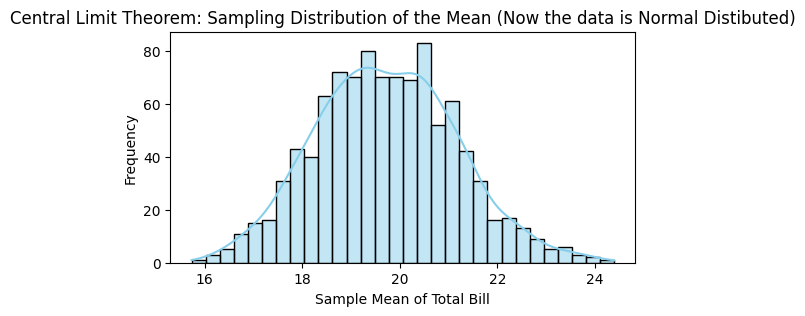

In [133]:
# Plot the distribution of sample means
plt.figure(figsize=(6,3))
sns.histplot(sample_means, bins=30, kde=True, color="skyblue")
plt.title("Central Limit Theorem: Sampling Distribution of the Mean (Now the data is Normal Distibuted)")
plt.xlabel("Sample Mean of Total Bill")
plt.ylabel("Frequency")
plt.show()

# Hypothesis Testing
1. T-Test

One-sample t-test: A sample mean is significantly different from a population mean.

Two-sample t-test: Two independent samples have significantly different means.

2. Z-Test

In [134]:
# One-Sample T-Test

import numpy as np
from scipy import stats

# Generate random sample data
np.random.seed(42)
sample = np.random.normal(52,10,30)  # mean=52, std=10

# Hypothesized population mean (Farzi population mean)
population_mean = 50

# Perform one-sample t-test (Which is based on data and pop_mean)
t_stat, p_value = stats.ttest_1samp(sample, population_mean)

print(f"Sample Mean: {np.mean(sample)}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Sample mean is significantly different from 50")
else:
    print("Fail to reject the null hypothesis: No significant difference from 50")


Sample Mean: 50.118531041489625
T-statistic: 0.07213517949624637
P-value: 0.9429895415189937
Fail to reject the null hypothesis: No significant difference from 50


In [135]:
# Two-Sample T-Test (Independent)

# Generate two independent samples
group1 = np.random.normal(loc=55, scale=10, size=40)  # Mean = 55
group2 = np.random.normal(loc=50, scale=10, size=40)  # Mean = 50

# Perform independent two-sample t-test (assumes equal variances by default)
t_stat2, p_value2 = stats.ttest_ind(group1, group2)

print(f"Group1 Mean: {np.mean(group1):.2f}")
print(f"Group2 Mean: {np.mean(group2):.2f}")
print(f"T-statistic: {t_stat2:.2f}")
print(f"P-value: {p_value2:.4f}")

# Interpretation
if p_value2 < 0.05:
    print("Reject the null hypothesis: Means are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means.")




Group1 Mean: 54.05
Group2 Mean: 49.64
T-statistic: 2.17
P-value: 0.0330
Reject the null hypothesis: Means are significantly different.


In [136]:
# Z-Test for random data:

import numpy as np
from scipy import stats

# Step 1: Generate random data
np.random.seed(0)
sample = np.random.normal(52,10,100)  # mean=52, std=10, n=100

# Step 2: Define population mean (hypothesized)
population_mean = 50

# Step 3: Calculate sample mean and sample size
sample_mean = np.mean(sample)
sample_size = len(sample)

# Step 4: Assume known population standard deviation (Z-test requirement)
population_std = 10

# Step 5: Compute Standard Error
standard_error = population_std / np.sqrt(sample_size)

# Step 6: Calculate Z-score
z_score = (sample_mean - population_mean) / standard_error

# Step 7: Compute p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Step 8: Output results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

# Step 9: Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Sample mean is significantly different from 50.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 50.")



Sample Mean: 52.60
Z-score: 2.60
P-value: 0.0094
Reject the null hypothesis: Sample mean is significantly different from 50.


In [137]:
import seaborn as sns
import numpy as np
from scipy import stats

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Drop rows with missing age
# titanic = titanic.dropna(subset=['age'])

# Fill missing age values with the mean of the existing age values in the titanic DataFrame
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

# Step 1: Full population statistics
population_ages = titanic['age']
population_mean = np.mean(population_ages)
population_std = np.std(population_ages, ddof=0)
population_size = len(population_ages)

# Step 2: Create a random sample (e.g., 50 passengers)
np.random.seed(42)  # reproducibility
sample_ages = population_ages.sample(n=50, random_state=42)
sample_mean = np.mean(sample_ages)
sample_size = len(sample_ages)

# Step 3: Standard Error using population std
standard_error = population_std / np.sqrt(sample_size)

# Step 4: Z-score
z_score = (sample_mean - population_mean) / standard_error

# Step 5: P-value (two-tailed)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Step 6: Print Results
print(f"Population Mean Age: {population_mean:.2f}")
print(f"Sample Mean Age: {sample_mean:.2f}")
print(f"Z-Score: {z_score:.2f}")
print(f"P-Value: {p_value:.4f}")

# Step 7: Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Sample mean age is significantly different from population mean age.")
else:
    print("Fail to reject the null hypothesis: No significant difference between sample and population mean age.")

Population Mean Age: 29.70
Sample Mean Age: 26.91
Z-Score: -1.52
P-Value: 0.1296
Fail to reject the null hypothesis: No significant difference between sample and population mean age.


In [138]:
import numpy as np
from scipy import stats

# Step 1: Generate random data
np.random.seed(0)
sample = np.random.normal(loc=52, scale=10, size=100)  # mean=52, std=10, n=100

# Step 2: Define population mean (hypothesized)
population_mean = 50

# Step 3: Calculate sample mean and sample size
sample_mean = np.mean(sample)
sample_size = len(sample)

# Step 4: Assume known population standard deviation (Z-test requirement)
population_std = 10

# Step 5: Compute Standard Error
standard_error = population_std / np.sqrt(sample_size)

# Step 6: Calculate Z-score
z_score = (sample_mean - population_mean) / standard_error

# Step 7: Compute p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Step 8: Output results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

# Step 9: Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Sample mean is significantly different from 50.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 50.")


Sample Mean: 52.60
Z-score: 2.60
P-value: 0.0094
Reject the null hypothesis: Sample mean is significantly different from 50.


In [142]:
# another way to find Z-test:
# Step-1: Import libraries
import numpy as np
from statsmodels.stats import weightstats as stests

# Step-2: Create a sample data
ages = np.array([32, 34, 29, 29, 22, 39, 38, 37, 38, 36, 30, 26, 22, 22, 27, 29, 21, 20, 25, 24, 24, 26, 27, 28, 29, 30, 32, 34, 27, 29, 21, 20, 25, 24, 24, 26, 27, 28, 29, 30, 32, 34])

# Step-3: Perform the Z-test
z_statistic, p_value = stests.ztest(ages, value=30, alternative='two-sided')

# Step-4: Print the results
print(f"z-statistic: {z_statistic}")
print(f"p-value: {p_value}")

# print the results based on if else condition
if p_value < 0.05:
    print("Reject the null hypothesis,\n as the sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis,\n as the sample mean is not significantly different from the population mean.")

z-statistic: -2.2355502631512842
p-value: 0.025381245676198847
Reject the null hypothesis,
 as the sample mean is significantly different from the population mean.


In [139]:
#  chi-square test

import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Step 1: Create a contingency table
contingency_table = pd.crosstab(titanic['sex'], titanic['survived'])

# Step 2: Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 3: Output results
print("Contingency Table:")
print(contingency_table, "\n")

print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value:.4f}")

# Step 4: Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Survival is associated with sex.")
else:
    print("Fail to reject the null hypothesis: Survival is independent of sex.")


Contingency Table:
survived    0    1
sex               
female     81  233
male      468  109 

Chi-Square Statistic: 260.71702016732104
Degrees of Freedom: 1
P-Value: 0.0000
Reject the null hypothesis: Survival is associated with sex.


In [140]:
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro

# Load Titanic data
df = sns.load_dataset('titanic')

# Drop missing values in 'age' (its a best way to assign a varible)
age_data = df['age'].dropna()

# Shapiro-Wilk Test
stat, p_value = shapiro(age_data)

print(f"statistic = {stat}")
print(f"p-value = {p_value:.4f}")

# Hypothesis decision
if p_value < 0.05:
    print("Reject null hypothesis: Age is normally distributed.")
else:
    print("Fail to Reject null hypothesis: Age is not normally distributed.")


statistic = 0.9814577414504954
p-value = 0.0000
Reject null hypothesis: Age is normally distributed.


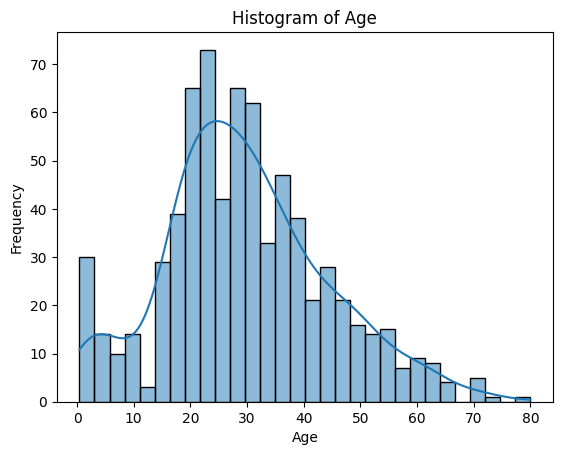

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(age_data, kde=True, bins=30)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [143]:
# One-Way Anova (use for two or more than two groups:)

import scipy.stats as stats

# Sample data: Growth of plants with three types of fertilizers
fertilizer1 = [20, 22, 19, 24, 25]
fertilizer2 = [28, 30, 27, 26, 29]
fertilizer3 = [18, 20, 22, 19, 24]

# Perform the one-way ANOVA
f_stat, p_val = stats.f_oneway(fertilizer1, fertilizer2, fertilizer3)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# print the results based on if the p-value is less than 0.05

if p_val < 0.05:
    print(f"Reject null hypothesis: The means are not equal, as the p-value: {p_val} is less than 0.05")
else:
    print(f"Accept null hypothesis: The means are equal, as the p-value: {p_val} is greater than 0.05")

F-statistic: 15.662162162162158
p-value: 0.00045154047609972817
Reject null hypothesis: The means are not equal, as the p-value: 0.00045154047609972817 is less than 0.05


In [144]:
# One-way ANOVA using statsmodels
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a dataframe
# Sample data: Growth of plants with three types of fertilizers
fertilizer1 = [20, 22, 19, 24, 25]
fertilizer2 = [28, 30, 27, 26, 29]
fertilizer3 = [18, 20, 22, 19, 24]

df = pd.DataFrame({"fertilizer": ["fertilizer1"] * 5 + ["fertilizer2"] * 5 + ["fertilizer3"] * 5,
                   "growth": fertilizer1 + fertilizer2 + fertilizer3})

# Fit the model
model = ols("growth ~ fertilizer", data=df).fit()

# Perform ANOVA and print the summary table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# print the results based on if the p-value is less than 0.05
if anova_table["PR(>F)"][0] < 0.05:
    print(f"Reject null hypothesis: The means are not equal, as the p-value is less than 0.05")
else:
    print(f"Accept null hypothesis: The means are equal, as the p-value is greater than 0.05")

                sum_sq    df          F    PR(>F)
fertilizer  154.533333   2.0  15.662162  0.000452
Residual     59.200000  12.0        NaN       NaN
Reject null hypothesis: The means are not equal, as the p-value is less than 0.05


/tmp/ipython-input-144-4020113244.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table["PR(>F)"][0] < 0.05:
